# Data Analysis Continuous Assessment Part 2: Mini-Project Implementation

## 1. Preparing the Data Set for Analysis

### Data set description/initial variable selection

The data set for the mini-project includes selected variables from <strong>Electoral System Design Database/Voter Turnout Database</strong> compiled by the International Institute for Democracy and Electoral Assistance (https://www.idea.int/advanced-search) 

<b>Voter Turnout Database (Parliamentary Data):</b><i> Country, Voter turnout, Total vote, Registration, Voting age population turnout, Voting age population, Population (total), Invalid votes, Compulsory voting</i>

<b>Electoral System Design Database:</b> <i>Electoral system family, Legislative size (voting members)</i>

Countries which had significant amounts of missing data in one of the databases (particularly in the <i>Electoral family</i> and <i>Legislative size (voting members)</i>) columns were filtered out before exporting the dataset as it allowed filtering by country.

### Data set cleaning in Excel

<ul>
    <li>Minor formatting issues were fixed manually (Data in a wrong column due to missing data in the <i>Invalid votes</i> column in a few cases)</li>
    <li>The field formats were changed from 'General' to 'Number' and 'Text' format in Excel once data was imported into Jupyter Notebook.</li>
    <li><i>Invalid votes</i> and <i>Legislative size (voting members)</i> columns had a small amount of missing data which was marked with value -1 for easier identification.</li>
    <li>I observed that the <i>Voting age population turnout</i> column showed some values with percentage over 100%.</li>
</ul>

### Data set cleaning in Jupyter Notebook

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


I loaded the .csv file into a data frame, renamed the columns with shorter names, and set the data frame index to 1. I checked if the data had loaded correctly by printing the first 15 rows of the data frame, and then checked how many rows and columns the data frame had, as well as what types of data were in the columns to make sure it matched my expectations.

In [107]:
idea_df = pd.read_csv("idea.csv")
# This renames all the columns with a shorter name
idea_df.columns = ['Country', 'VoterTurnout(%)', 'TotalVote', 'Registration', 'VotingAgePopulationTurnout(%)', 'VotingAgePopulation', 'Population', 'InvalidVotes(%)', 'CompulsoryVoting', 'ElectoralSystemFamily', 'LegislativeSizeVotingMembers']
# This starts the dataframe index at 1
idea_df.index = idea_df.index + 1

In [108]:
# This prints the first 15 rows of the data frame to check if the information has been loaded correctly from the .csv file
idea_df.head(15)


,Country,VoterTurnout(%),TotalVote,Registration,VotingAgePopulationTurnout(%),VotingAgePopulation,Population,InvalidVotes(%),CompulsoryVoting,ElectoralSystemFamily,LegislativeSizeVotingMembers
1,Afghanistan,0.45,4000000.0,8843151.0,0.22,18340292.0,34940837.0,0.04,No,Other,250.0
2,Albania,0.47,1614479.0,3452324.0,0.69,2356975.0,3047987.0,0.02,No,PR,140.0
3,Algeria,0.37,8624199.0,23251503.0,0.32,27248442.0,40969443.0,0.25,No,PR,462.0
4,Andorra,0.68,18638.0,27278.0,0.26,71161.0,85684.0,0.05,No,Mixed,28.0
5,Angola,0.76,7093002.0,9317294.0,0.53,13366186.0,29310273.0,0.04,No,PR,220.0
6,Anguilla,0.61,7293.0,11951.0,0.54,13422.0,18090.0,0.05,No,Plurality/Majority,13.0
7,Antigua and Barbuda,0.90,43077.0,47721.0,0.70,61571.0,91295.0,0.01,No,Plurality/Majority,17.0
8,Argentina,0.81,27698054.0,34218538.0,0.83,33442549.0,45089492.0,0.07,Yes,PR,257.0
9,Armenia,0.49,1261105.0,2593140.0,0.53,2362422.0,3038217.0,0.00,No,PR,132.0
10,Aruba,0.84,59403.0,70750.0,0.65,90840.0,115120.0,0.01,No,PR,21.0


In [109]:
# this shows how many rows and columns the data frame has
idea_df.shape

(198, 11)

In [110]:
# this shows the types of data in the columns
idea_df.dtypes

Country                           object
VoterTurnout(%)                  float64
TotalVote                        float64
Registration                     float64
VotingAgePopulationTurnout(%)    float64
VotingAgePopulation              float64
Population                       float64
InvalidVotes(%)                  float64
CompulsoryVoting                  object
ElectoralSystemFamily             object
LegislativeSizeVotingMembers     float64
dtype: object

I considered whether the data would benefit from standardization or normalization, however as the model types I will be using are not as affected by the scale of the features, I decided against it.

I have made histograms to visualize the distributions of the numeric variables to assist with the next steps of data cleaning.

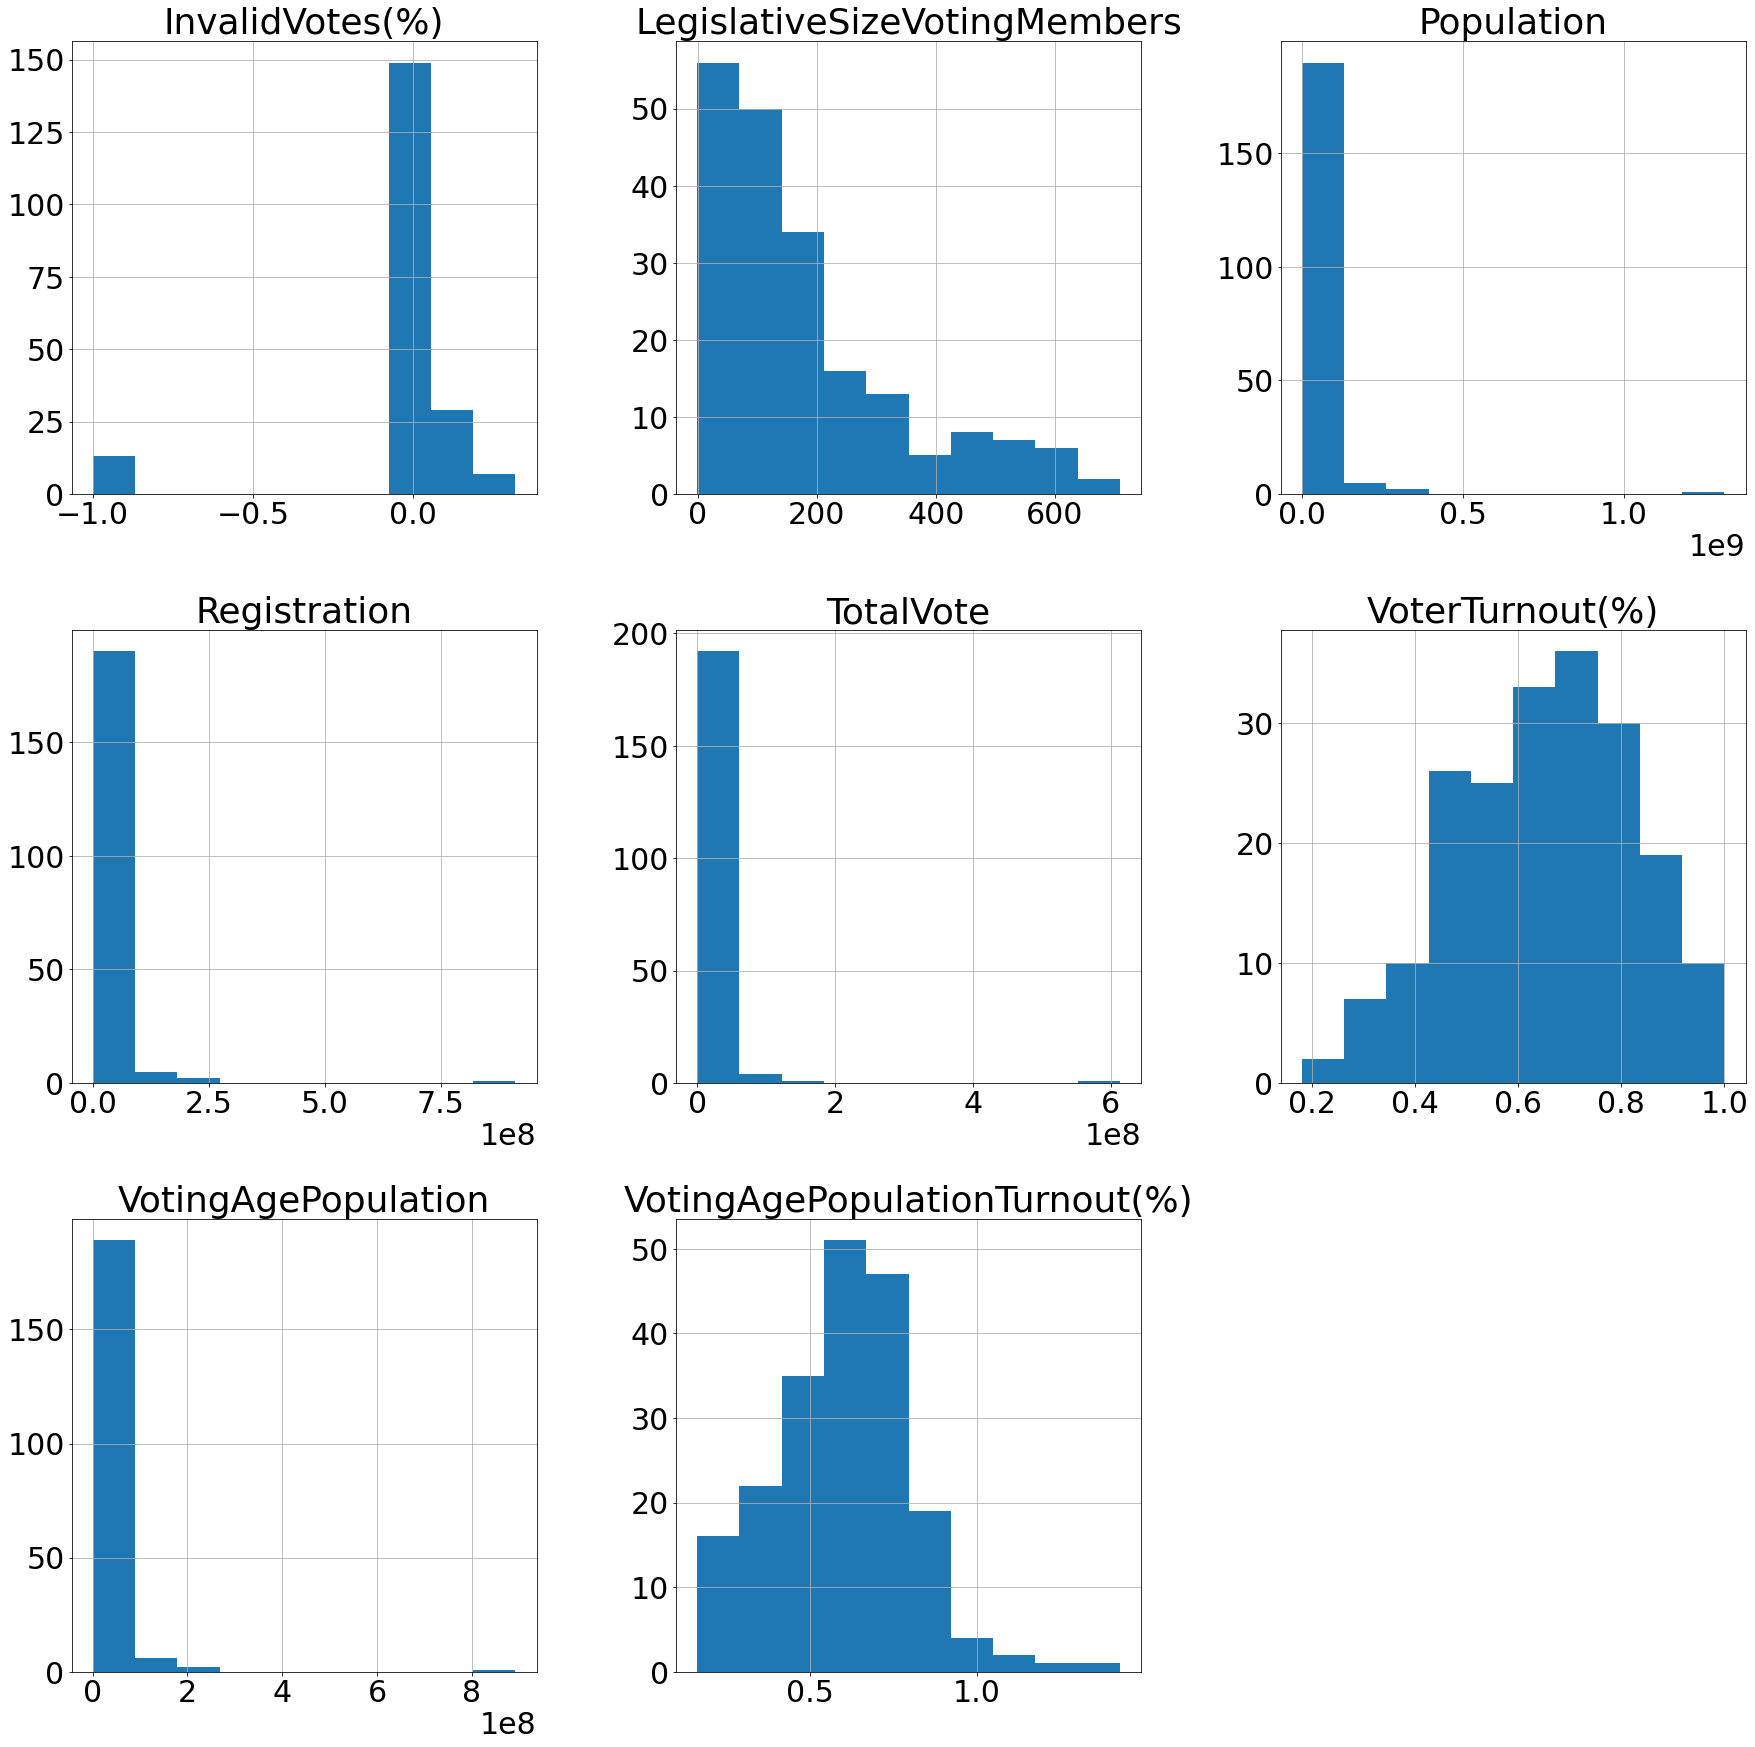

In [111]:
names = ['VoterTurnout(%)', 'TotalVote', 'Registration', 'VotingAgePopulationTurnout(%)', 'VotingAgePopulation', 'Population', 'InvalidVotes(%)', 'LegislativeSizeVotingMembers']
# this establishes the font size
plt.rc('font', size=30)
# this establishes the histogram size
idea_df.hist(figsize=(30,30))
plt.savefig('histogram.png', format='png')
plt.show()

Most distributions appeared positively skewed, with <i>VoterTurnout(%)</i> and <i>VotingAgePopulationTurnout(%)</i> showing closer to normal distributions. 

Notable from these graphs:
<ul>
    <li>As I observed in Excel, <i>InvalidVotes(%)</i> value is missing for several rows, which shows as a peak at -1.</li>
    <li>Confirming my observation in Excel, there are several values above 100% in the <i>VotingAgePopulationTurnout(%)</i> column</li>
    <li>While it looks like there may be outliers in <i>Population</i>, <i>Registration</i>, <i>TotalVote</i> and <i>VotingAgePopulation</i>, on review, these are the small number of countries with populations over approximately 200 million. I debated whether to exclude these countries, but decided to leave them in for this project.</li>
</ul>


After reviewing the histograms, I checked all the numeric values for missing data, and the numeric columns representing percentages for values over 100%.

In [112]:
print('Missing data - values < 0:')
print()
print((idea_df[['VoterTurnout(%)', 'TotalVote', 'Registration', 'VotingAgePopulationTurnout(%)', 'VotingAgePopulation', 'InvalidVotes(%)', 'LegislativeSizeVotingMembers']] < 0).sum())
print()
print()
print ('Outlier data - values > 100%:')
print()
print((idea_df[['VoterTurnout(%)', 'VotingAgePopulationTurnout(%)', 'InvalidVotes(%)']] > 1).sum())


Missing data - values < 0:

VoterTurnout(%)                   0
TotalVote                         0
Registration                      0
VotingAgePopulationTurnout(%)     0
VotingAgePopulation               0
InvalidVotes(%)                  13
LegislativeSizeVotingMembers      1
dtype: int64


Outlier data - values > 100%:

VoterTurnout(%)                  0
VotingAgePopulationTurnout(%)    6
InvalidVotes(%)                  0
dtype: int64


In [115]:
#this calculates the percentage of the missing values for InvalidVotes
idea_df['InvalidVotes(%)'] = idea_df['InvalidVotes(%)'].mask(idea_df['InvalidVotes(%)'] == -1, np.NaN)
per_invalid_votes = (idea_df['InvalidVotes(%)'].isnull().sum() / idea_df.shape[0]) * 100
print('Percentage of InvalidVotes(%) missing:', per_invalid_votes, '%')
print()

Percentage of InvalidVotes(%) missing: 6.565656565656567 %



Invalid Votes was missing in 6.6% of all rows, so I decided to impute a mean value for the missing rows as they comprised more than 5% of the data set. The percentage of rows of missing values was high enough that deleting them might compromise the data set.

I identified a missing value at row 23, imputed the mean for missing values in this column, and confirmed that the missing value was succesfully replaced.

In [60]:
# this prints the first 25 rows of data in the InvalidVotes(%) column so we can see a missing value
print(idea_df['InvalidVotes(%)'].head(25))

1     0.04
2     0.02
3     0.25
4     0.05
5     0.04
6     0.05
7     0.01
8     0.07
9     0.00
10    0.01
11    0.06
12    0.01
13    0.04
14    0.01
15    0.00
16    0.03
17    0.00
18    0.01
19    0.06
20    0.01
21    0.14
22    0.09
23     NaN
24    0.05
25    0.09
Name: InvalidVotes(%), dtype: float64


In [61]:
# fill in missing values with mean column values
idea_df.fillna(idea_df.mean(), inplace=True)

In [62]:
print(idea_df['InvalidVotes(%)'].head(25))

1     0.040000
2     0.020000
3     0.250000
4     0.050000
5     0.040000
6     0.050000
7     0.010000
8     0.070000
9     0.000000
10    0.010000
11    0.060000
12    0.010000
13    0.040000
14    0.010000
15    0.000000
16    0.030000
17    0.000000
18    0.010000
19    0.060000
20    0.010000
21    0.140000
22    0.090000
23    0.040811
24    0.050000
25    0.090000
Name: InvalidVotes(%), dtype: float64


In [63]:
# this shows how many rows and columns the data frame has - as the values were imputed the number of rows is still the same
print(idea_df.shape)

(198, 11)


<i>LegislativeSizeVotingMembers</i> was missing one instance, therefore I considered it safe to remove that row.

In [64]:
#this calculates the percentage of the missing values for LegislativeSizeVotingMembers
idea_df['LegislativeSizeVotingMembers'] = idea_df['LegislativeSizeVotingMembers'].mask(idea_df['LegislativeSizeVotingMembers'] < 0, np.NaN)
per_leg_mem_missing = (idea_df['LegislativeSizeVotingMembers'].isnull().sum() / idea_df.shape[0]) * 100
print('Percentage of LegislativeSizeVotingMembers missing:', per_leg_mem_missing, '%')

Percentage of LegislativeSizeVotingMembers missing: 0.5050505050505051 %


In [65]:
# drop the missing values
idea_df.dropna(inplace=True)

In [66]:
# this shows how many rows and columns the data frame has - now the rows have reduced by 1
print(idea_df.shape)

(197, 11)


During review of the data in Excel I noticed that some of the values in the VotingAgePopulationTurnout column exceeded 100%. As I am not a domain expert on this particular metric, I decided that it was safest to remove any rows exceeding 100%, of which there were 6.

In [67]:
#this calculates the percentage of the outliers for InvalidVotes
idea_df['VotingAgePopulationTurnout(%)'] = idea_df['VotingAgePopulationTurnout(%)']. mask(idea_df['VotingAgePopulationTurnout(%)'] > 1, np.NaN)
per_vap_turnout_too_high = (idea_df['VotingAgePopulationTurnout(%)'].isnull().sum() / idea_df.shape[0]) * 100
print('Percentage of VotingAgePopulationTurnout(%) greater than 100%', per_vap_turnout_too_high, "%")

Percentage of VotingAgePopulationTurnout(%) greater than 100% 3.0456852791878175 %


In [68]:
# drop the outlier values
idea_df.dropna(inplace=True)

In [69]:
# this shows how many rows and columns the data frame has - now the rows have reduced by 6
print(idea_df.shape)

(191, 11)


I transformed the numeric VoterTurnout% to a categorical VoterTurnoutCategory with values low medium and high. This was based on feedback to my proposal that predicting a categorical variable would be well-suited to my chosen predictive models.

As <i>VoterTurnout(%)</i> is not uniformly  distributed, I calculated the quantiles for my own information and then used the qcut function to split the groups to make them as close to equal size as possible. 

In [70]:
# this prints the quantile values
print(idea_df['VoterTurnout(%)'].quantile([1./3, 2./3]))

0.333333    0.573333
0.666667    0.730000
Name: VoterTurnout(%), dtype: float64


In [71]:
# this splits the groups into categories aligned with the quantile values
idea_df['VoterTurnoutCategory'] = pd.qcut(idea_df['VoterTurnout(%)'], q=3, labels=['Low', 'Medium', 'High'])
print(idea_df['VoterTurnoutCategory'])

1         Low
2         Low
3         Low
4      Medium
5        High
        ...  
194      High
195    Medium
196      High
197       Low
198      High
Name: VoterTurnoutCategory, Length: 191, dtype: category
Categories (3, object): [Low < Medium < High]


I then dropped the country column as it was not needed for subsequent analysis and would be a potential source of bias in my own analysis and exported the cleaned data into a new CSV.

In [72]:
# this removes the country name column which is not required for the purposes of the mini project
idea_df.drop('Country', axis=1, inplace=True)

In [73]:
# this saves the cleaned file to CSV removing the empty index row
idea_df.to_csv('idea_df_cln.csv', index=False)

## 2. Exploratory Questions

In [74]:
import scipy.stats as sps

# this imports the statistics functions needed for the tests

I loaded the CSV file with cleaned data and confirmed that the data was as expected. I then performed the tests to answer the exploratory questions.

In [75]:
idea_df_cln = pd.read_csv('idea_df_cln.csv')
# This starts the dataframe index at 1
idea_df_cln.index = idea_df_cln.index + 1
# This prints the first 15 rows of the data frame to check if the information has been loaded correctly from the .csv file
idea_df_cln.head(15)


,VoterTurnout(%),TotalVote,Registration,VotingAgePopulationTurnout(%),VotingAgePopulation,Population,InvalidVotes(%),CompulsoryVoting,ElectoralSystemFamily,LegislativeSizeVotingMembers,VoterTurnoutCategory
1,0.45,4000000.0,8843151.0,0.22,18340292.0,34940837.0,0.04,No,Other,250.0,Low
2,0.47,1614479.0,3452324.0,0.69,2356975.0,3047987.0,0.02,No,PR,140.0,Low
3,0.37,8624199.0,23251503.0,0.32,27248442.0,40969443.0,0.25,No,PR,462.0,Low
4,0.68,18638.0,27278.0,0.26,71161.0,85684.0,0.05,No,Mixed,28.0,Medium
5,0.76,7093002.0,9317294.0,0.53,13366186.0,29310273.0,0.04,No,PR,220.0,High
6,0.61,7293.0,11951.0,0.54,13422.0,18090.0,0.05,No,Plurality/Majority,13.0,Medium
7,0.90,43077.0,47721.0,0.70,61571.0,91295.0,0.01,No,Plurality/Majority,17.0,High
8,0.81,27698054.0,34218538.0,0.83,33442549.0,45089492.0,0.07,Yes,PR,257.0,High
9,0.49,1261105.0,2593140.0,0.53,2362422.0,3038217.0,0.00,No,PR,132.0,Low
10,0.84,59403.0,70750.0,0.65,90840.0,115120.0,0.01,No,PR,21.0,High


In [76]:
# this shows how many rows and columns the data frame has 
idea_df_cln.shape

(191, 11)

### Is voting age population size corellated with turnout in parliamentary elections
#### Variables: Voter turnout(%), Voting age population
#### Test: Pearson correlation

In [77]:
# this calculates and prints the Pearson correlation
r, p = sps.pearsonr(idea_df_cln['VoterTurnout(%)'], idea_df_cln['VotingAgePopulation'])
print('r = ' + str(r))
print('p = ' + str(p))

r = -0.0075972252578043725
p = 0.9169249112016887


The high p-value means that the voting age population is not correlated with turnout in parliamentary elections.

### Is the electoral system family related to voter turnout?
#### Variables: voter turnout, Electoral system family
#### Test: One-way ANOVA

I printed the contingency table for these variables for my own information. Although the ANOVA test was performed on <i>VoterTurnout(%)</i>, I used <i>VoterTurnoutCategory</i>  in the contingency table to simplify the information.

In [79]:
# contingency table for ANOVA
turnout_electoral_family_tab = pd.crosstab(index=idea_df_cln['VoterTurnoutCategory'], columns=idea_df_cln['ElectoralSystemFamily'])
turnout_electoral_family_tab

ElectoralSystemFamily,Mixed,Other,PR,Plurality/Majority,Plurality/Majority and PR
VoterTurnoutCategory,,,,,
High,11,0,27,23,0
Low,11,2,27,22,2
Medium,10,1,28,27,0


Informally, there is no immediately obvious relationship on visual inspection. 

I then ran the ANOVA test.

In [81]:
# this runs the one-way ANOVA test
sps.f_oneway(*(idea_df_cln['VoterTurnout(%)'][idea_df_cln['ElectoralSystemFamily'] == ElectoralSystemFamily] for ElectoralSystemFamily in idea_df_cln['ElectoralSystemFamily'].unique()))


F_onewayResult(statistic=1.1644671552640788, pvalue=0.3279682622598798)

The p-value is not statistically significant, which means that voter turnout is not related to the electoral system family.

### Is compulsory voting related to the electoral system family?
#### Variables: Compulsory voting, Electoral system family
#### Test: Chi squared

In [83]:
#Contingency table for Chi-squared
compulsory_voting_electoral_family_tab = pd.crosstab(index=idea_df_cln['CompulsoryVoting'], columns=idea_df_cln['ElectoralSystemFamily'])
compulsory_voting_electoral_family_tab

ElectoralSystemFamily,Mixed,Other,PR,Plurality/Majority,Plurality/Majority and PR
CompulsoryVoting,,,,,
No,29,3,65,68,1
Yes,3,0,17,4,1


Informally, there looks like there may be a relationship between these variables - compulsory voting seems to be most common under the PR electoral system family.

I then ran the Chi-squared test.

In [84]:
# this calculates and prints the chi-squared values
chisq, p, dof, evs = sps.chi2_contingency(compulsory_voting_electoral_family_tab)
print('chi-squared ' + str(chisq))
print('p = ' + str(p))
print('degrees of freedom = ' + str(dof))
print('expected value table: ')
print(evs)

chi-squared 11.037578464263557
p = 0.026144914697136565
degrees of freedom = 4
expected value table: 
[[27.81151832  2.60732984 71.26701571 62.57591623  1.7382199 ]
 [ 4.18848168  0.39267016 10.73298429  9.42408377  0.2617801 ]]


The p-value is low and is below the threshold for the 5% significance level, indicating that there is likely a relationship between compulsory voting and the electoral system family.

# 3. Predictive Models

I used Naïve Bayes and Decision Tree models to predict VoterTurnoutVategory based on other features of the dataset. I performed cross-validation and measured accuracy to determine the models' effectiveness.

## i. Naïve Bayes

I only imported numeric variables because the dataset is mostly numeric and sklearn implementation of Naïve Bayes requires either all categorical or all numeric features. I also excluded the numeric columns  <i>VoterTurnout(%)</i> and <i>TotalVote</i> as indicated in my proposal because <i>VoterTurnout(%)</i> is the value we are looking to predict in numeric form while <i>TotalVote</i> divided by <i>Registration</i> also yields this value.

In [85]:
# this imports only the required data
nb_data = ['Registration', 'VotingAgePopulationTurnout(%)','VotingAgePopulation', 'Population', 'InvalidVotes(%)', 'LegislativeSizeVotingMembers', 'VoterTurnoutCategory']
voting_turnout_nb = pd.read_csv('idea_df_cln.csv', usecols=nb_data)
# This starts the dataframe index at 1
voting_turnout_nb.index = voting_turnout_nb.index + 1
# This prints the first 15 rows of the data frame to check if the information has been loaded correctly from the .csv file
voting_turnout_nb.head(10)

,Registration,VotingAgePopulationTurnout(%),VotingAgePopulation,Population,InvalidVotes(%),LegislativeSizeVotingMembers,VoterTurnoutCategory
1,8843151.0,0.22,18340292.0,34940837.0,0.04,250.0,Low
2,3452324.0,0.69,2356975.0,3047987.0,0.02,140.0,Low
3,23251503.0,0.32,27248442.0,40969443.0,0.25,462.0,Low
4,27278.0,0.26,71161.0,85684.0,0.05,28.0,Medium
5,9317294.0,0.53,13366186.0,29310273.0,0.04,220.0,High
6,11951.0,0.54,13422.0,18090.0,0.05,13.0,Medium
7,47721.0,0.70,61571.0,91295.0,0.01,17.0,High
8,34218538.0,0.83,33442549.0,45089492.0,0.07,257.0,High
9,2593140.0,0.53,2362422.0,3038217.0,0.00,132.0,Low
10,70750.0,0.65,90840.0,115120.0,0.01,21.0,High


I chose Gaussian Naïve Bayes over other options as some of the numeric distributions resembled Gaussian distributions, so it seemed like the best fit. 

I imported GaussianNB, a class from the sklearn package to implement the model training. 

In [86]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
gnb = GaussianNB()

I used the test_train_split function to split the data into a training set and the test set, and also separated the predictor and target attributes.

In [88]:
vt_nb_X_train, vt_nb_X_test, vt_nb_y_train, vt_nb_y_test = train_test_split(voting_turnout_nb.iloc[:,:-1], voting_turnout_nb['VoterTurnoutCategory'], test_size=0.5)
vt_nb_X_train.head(10)

,Registration,VotingAgePopulationTurnout(%),VotingAgePopulation,Population,InvalidVotes(%),LegislativeSizeVotingMembers
17,255833.0,0.67,230005.0,293131.0,0.000000,30.0
14,184000.0,0.67,240360.0,329988.0,0.010000,39.0
178,3291312.0,0.80,3756802.0,5411012.0,0.040811,125.0
155,2651435.0,0.51,4945158.0,6209660.0,0.020000,104.0
177,59367469.0,0.89,57547968.0,81257239.0,0.020000,600.0
162,1341671.0,0.58,1808337.0,3761904.0,0.050000,132.0
38,14347288.0,0.50,13472122.0,17789267.0,0.100000,155.0
4,27278.0,0.26,71161.0,85684.0,0.050000,28.0
145,48173.0,0.69,41095.0,53821.0,0.010000,15.0
36,1225300.0,0.27,2005942.0,4950027.0,0.050000,131.0


I trained the model.

In [89]:
gnb.fit(vt_nb_X_train, vt_nb_y_train)

GaussianNB()

I reviewed the predictions on the test set.

In [91]:
vt_nb_pred = gnb.predict(vt_nb_X_test)
vt_nb_pred

array(['Medium', 'Medium', 'High', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Low', 'Medium', 'High', 'Medium', 'High',
       'High', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'High',
       'Medium', 'Medium', 'Medium', 'High', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'High', 'Medium', 'Medium',
       'High', 'Medium', 'High', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Low', 'Medium', 'Medium', 'High', 'High', 'Medium',
       'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'High',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Low',
       'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'High', 'High',
       'Medium', 'Medium', 'Medium', 'Medium', 'High', 

I checked the accuracy of the model on the test set and printed the confusion matrix.

In [92]:
vt_nb_accuracy = len(vt_nb_y_test[vt_nb_y_test == vt_nb_pred])/len(vt_nb_pred)
vt_nb_accuracy

0.3229166666666667

In [94]:
pd.crosstab(vt_nb_y_test, vt_nb_pred, rownames=['Actual'], colnames=['Predicted'])

Predicted,High,Low,Medium
Actual,,,
High,3,2,20
Low,4,3,29
Medium,8,2,25


The accuracy of this model is below 50%, and thus is a poor model for predicting voter turnout. A random guess would be slightly better.



## ii. Decision Tree (Classification Tree)

I then used a classification tree to predict the same variable. In this case I used all variables other than <i>TotalVote</i> and <i>Registration</i> as sklearn implementation of decision trees allows for mixed variables.

In [99]:
# this imports only the required data
dt_data = ['Registration', 'VotingAgePopulationTurnout(%)', 'VotingAgePopulation', 'Population', 'InvalidVotes(%)', 'CompulsoryVoting', 'ElectoralSystemFamily','LegislativeSizeVotingMembers', 'VoterTurnoutCategory']
voting_turnout_dt = pd.read_csv('idea_df_cln.csv', usecols=dt_data)
# This starts the dataframe index at 1
voting_turnout_dt.index = voting_turnout_dt.index + 1
# This prints the first 15 rows of the data frame to check if the information has been loaded correctly from the .csv file
voting_turnout_dt.head(10)

,Registration,VotingAgePopulationTurnout(%),VotingAgePopulation,Population,InvalidVotes(%),CompulsoryVoting,ElectoralSystemFamily,LegislativeSizeVotingMembers,VoterTurnoutCategory
1,8843151.0,0.22,18340292.0,34940837.0,0.04,No,Other,250.0,Low
2,3452324.0,0.69,2356975.0,3047987.0,0.02,No,PR,140.0,Low
3,23251503.0,0.32,27248442.0,40969443.0,0.25,No,PR,462.0,Low
4,27278.0,0.26,71161.0,85684.0,0.05,No,Mixed,28.0,Medium
5,9317294.0,0.53,13366186.0,29310273.0,0.04,No,PR,220.0,High
6,11951.0,0.54,13422.0,18090.0,0.05,No,Plurality/Majority,13.0,Medium
7,47721.0,0.70,61571.0,91295.0,0.01,No,Plurality/Majority,17.0,High
8,34218538.0,0.83,33442549.0,45089492.0,0.07,Yes,PR,257.0,High
9,2593140.0,0.53,2362422.0,3038217.0,0.00,No,PR,132.0,Low
10,70750.0,0.65,90840.0,115120.0,0.01,No,PR,21.0,High


Dummies were then added for the text variables other than the target variable.

In [100]:
turnout_dummy_num_df = pd.concat([voting_turnout_dt[['Registration']],
                                  voting_turnout_dt[['VotingAgePopulationTurnout(%)']],
                                  voting_turnout_dt[['VotingAgePopulation']],
                                  voting_turnout_dt[['Population']],
                                  voting_turnout_dt[['InvalidVotes(%)']],
                                  voting_turnout_dt.CompulsoryVoting.str.get_dummies(),
                                  voting_turnout_dt.ElectoralSystemFamily.str.get_dummies(),
                                  voting_turnout_dt[['LegislativeSizeVotingMembers']]], axis=1)

turnout_dummy_num_df

,Registration,VotingAgePopulationTurnout(%),VotingAgePopulation,Population,InvalidVotes(%),No,Yes,Mixed,Other,PR,Plurality/Majority,Plurality/Majority and PR,LegislativeSizeVotingMembers
1,8843151.0,0.22,18340292.0,34940837.0,0.04,1,0,0,1,0,0,0,250.0
2,3452324.0,0.69,2356975.0,3047987.0,0.02,1,0,0,0,1,0,0,140.0
3,23251503.0,0.32,27248442.0,40969443.0,0.25,1,0,0,0,1,0,0,462.0
4,27278.0,0.26,71161.0,85684.0,0.05,1,0,1,0,0,0,0,28.0
5,9317294.0,0.53,13366186.0,29310273.0,0.04,1,0,0,0,1,0,0,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,67500000.0,0.98,68142322.0,95261021.0,0.01,1,0,0,0,0,1,0,496.0
188,15038.0,0.33,29282.0,36591.0,0.00,1,0,0,0,0,1,0,13.0
189,8097162.0,0.71,8509723.0,18701257.0,0.03,1,0,0,0,0,1,0,301.0
190,6698372.0,0.51,7331669.0,15510711.0,0.03,1,0,0,0,0,1,0,165.0


I used the test_train_split function to split the data into a training set and the test set, and also separated the predictor and target attributes.

In [101]:
vt_dt_X_train, vt_dt_X_test, vt_dt_y_train, vt_dt_y_test = train_test_split(turnout_dummy_num_df.iloc[:,:], voting_turnout_dt['VoterTurnoutCategory'], test_size=0.5)
vt_dt_X_train.head(10)

,Registration,VotingAgePopulationTurnout(%),VotingAgePopulation,Population,InvalidVotes(%),No,Yes,Mixed,Other,PR,Plurality/Majority,Plurality/Majority and PR,LegislativeSizeVotingMembers
76,8312264.0,0.72,8083846.0,9825704.0,0.010000,1,0,1,0,0,0,0,199.0
102,2457722.0,0.53,2237168.0,2731464.0,0.050000,1,0,1,0,0,0,0,141.0
50,74895.0,0.73,55256.0,74144.0,0.010000,1,0,0,0,0,1,0,32.0
160,36898883.0,0.65,40650233.0,49683254.0,0.020000,1,0,0,0,1,0,0,350.0
33,6900928.0,0.23,13001295.0,27744989.0,0.040000,1,0,0,0,0,1,0,180.0
108,7663464.0,0.31,8920714.0,19553397.0,0.050000,1,0,0,0,0,1,0,147.0
71,5179600.0,0.46,6556813.0,12527440.0,0.040000,1,0,1,0,0,0,0,114.0
178,3291312.0,0.80,3756802.0,5411012.0,0.040811,1,0,0,0,0,1,0,125.0
176,7065885.0,0.36,8219612.0,11622134.0,0.030000,1,0,0,0,1,0,0,217.0
86,101280758.0,0.52,102617759.0,127103388.0,0.030000,1,0,1,0,0,0,0,475.0


I trained the model.

In [102]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc.fit(vt_dt_X_train, vt_dt_y_train)

DecisionTreeClassifier()

I reviewed the predictions on the test set.

In [103]:
vt_dt_pred = dtc.predict(vt_dt_X_test)
vt_dt_pred

array(['Low', 'Medium', 'Medium', 'High', 'Low', 'High', 'Low', 'Low',
       'Medium', 'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Low',
       'Medium', 'Medium', 'High', 'High', 'High', 'Low', 'Low', 'Low',
       'Medium', 'Low', 'Low', 'Medium', 'High', 'Medium', 'High', 'High',
       'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Low', 'High',
       'Medium', 'Medium', 'Medium', 'Low', 'Low', 'Medium', 'Medium',
       'Low', 'High', 'Medium', 'Medium', 'Low', 'Low', 'High', 'Low',
       'Medium', 'High', 'Low', 'High', 'Medium', 'High', 'High', 'Low',
       'Medium', 'High', 'High', 'Medium', 'High', 'Medium', 'High',
       'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'High',
       'Low', 'Medium', 'Medium', 'High', 'Medium', 'Low', 'Medium',
       'High', 'Medium', 'Medium', 'Medium', 'Medium', 'High', 'Low',
       'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'High', 'Low'],
      dtype=object)

I checked the accuracy of the model on the test set and printed the confusion matrix.

In [104]:
vt_dt_accuracy = len(vt_dt_y_test[vt_dt_y_test == vt_dt_pred]) / len(vt_dt_pred)
vt_dt_accuracy

0.5416666666666666

In [105]:
pd.crosstab(vt_dt_y_test, vt_dt_pred, rownames=['Actual'], colnames=['Predicted'])

Predicted,High,Low,Medium
Actual,,,
High,13,2,15
Low,5,18,7
Medium,6,9,21


The accuracy of this model is above 50%. This is significantly better than the Naïve Bayes and also better than random. While with iteration and experimentation it may be possible to improve the accuracy, this is a promising first result.

# Conclusion

I have learned that:
<ul>
    <li>voting age population is not correlated with turnout in parliamentary elections</li>
    <li>electoral system family is also not related to turnout in parliamentary elections</li>
    <li>compulsory voting is related to the electoral system family at the 5% significance level</li>
    <li>for this dataset, and the features I chose, a classification tree was an effective predictive model</li>
    <li>for this dataset, and the features I chose, Naïve Bayes was not an effective predictive model and had accuracy similar to random guesses</li>
    </ul>
    
One possible explanation for why the classification tree performed better than Naïve Bayes is that it contained both categorical and numeric features, whereas Naïve Bayes only trained on the numeric features. Perhaps, one or more of the categorical features could be particularly predictive.
    

Possible further areas for exploration include:
<ul>
    <li>I chose to keep a number of borderline outliers in the dataset. It would be interesting to see what the effect of removing them would be.</li>
    <li>Gaussian Naïve Bayes assumes a normal distribution. The numeric features in my data had different distributions, some closer to normal and some skewed. One path for experimentation would be to limit the training to different subsets of these features.</li>
    <li>A regression tree could also be a suitable model, and it would be interesting to compare this to the classification tree.</li>
  </ul>  